# Logistics Regression (邏輯迴歸) 

## Bacteria 資料集
有一種特殊的細菌，在不同的大氣壓與溫度下有兩種活動模式<br>
bacteria_train.csv 與 bacteria_test.csv 兩個檔案中紀錄的資料說明如下:<br>
* 第一欄 temp 為溫度 (單位:攝氏度 °C)
* 第二欄 pressure 為壓力 (單位:百帕 hPa)
* 第三欄 type 為活動的模式，用 0、1 區分兩種不同的模式

接下來我們會一步一步完成一個邏輯迴歸模型，輸入溫度與壓力給該模型，模型便會告訴你細菌的活動模式。有幾點需要同學注意:<br>
1. **以下程式區塊中，有🚧符號的地方需要同學們自己撰寫或修改程式碼，同學可以新增多行程式碼來完成功能**
2. **程式碼中原始的函數名稱(def 後面的名稱)請不要更改，可能會造成後續的程式無法運行**


## import 必要套件

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 載入訓練資料與測試資料
利用 pandas 載入資料<br>
分別將訓練資料與測試資料儲存在 train_data 與 test_data 兩個變數中。<br>
同時我們print出兩筆資料的shape，了解資料在各個維度的尺寸。

**Hint: 用 pandas 載入兩個檔案的資料並將其轉換成 numpy 的形式儲存到 train_data 以及 test_data 中，最終train_data 的shape應該為[400,4]，test_data 為[50,3]**

In [4]:
train_data = pd.read_csv('bacteria_train.csv').to_numpy() # 🚧 載入bacteria_train.csv的資料並轉換成numpy格式
test_data =  pd.read_csv('bacteria_test.csv').to_numpy() # 🚧 載入bacteria_test.csv的資料並轉換成numpy格式

print(train_data.shape)
print(test_data.shape)

(400, 3)
(50, 3)


## 資料可視化 (3分)
利用 matplotlib 中的 scatter 函數，將 train_data 中兩種不同 type 的資料點用**不同顏色**標記在2D平面上<br>

**Hint: 分別用資料當中的第一欄與第二欄，當作平面座標中的x、y座標軸，並且根據第三欄中的類別畫出不同顏色的標記**

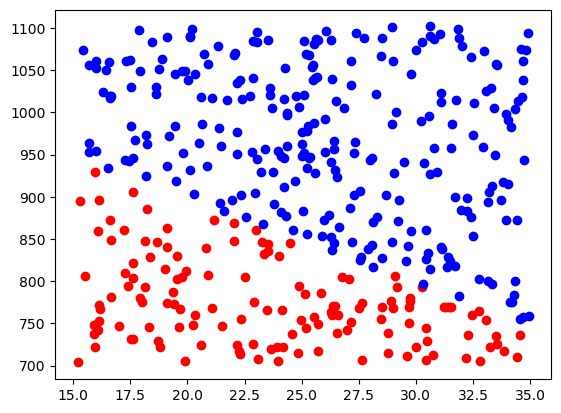

In [5]:
# 🚧 使用plt.scatter()函數畫圖
type_0 = train_data[train_data[:,2]==0]
type_1 = train_data[train_data[:,2]==1]

plt.scatter(type_0[:,0],type_0[:,1],color = 'r')
plt.scatter(type_1[:,0],type_1[:,1],color = 'b')



## 資料正規化
利用線性迴歸中的正規化方法，將訓練資料跟測試資料的"特徵"正規化<br>
以本次使用的資料集來說，特徵即為前兩欄的資料(溫度跟壓力)<br>
切記勿將第三欄的資料正規化，讓其維持0跟1兩種形式即可

**Hint: 資料正規化的步驟為，個別欄的資料先減去該欄的平均值，再除以該欄的標準差。使用np.mean()與np.std()函數可以計算出平均值與標準差**

In [9]:
# 🚧 資料正規化s
train_mean = np.mean(train_data[:,:2],axis = 0)
train_std = np.std(train_data[:,:2],axis = 0)

train_data[:,:2] = (train_data[:,:2]-train_mean)/train_std
test_data[:,:2] = (test_data[:,:2]-train_mean)/train_std

print(train_data[:,1].mean())

1.1102230246251566e-18


## 分離輸入特徵(x)與輸出資料(y)
將訓練資料與測試資料中的x(前兩欄)與y(最後一欄)資料分離
分離後用以下變數儲存：
* 訓練資料(共有N筆)
    * x_train: 訓練資料的輸入特徵，尺寸為[N,2]
    * y_train: 訓練資料的輸出，將最後的尺寸調整為[N, 1]，以利後面的運算
* 測試資料(共有U筆)
    * x_test: 測試資料的輸入特徵，尺寸為[U,2]
    * y_test: 測試資料的輸出，將最後的尺寸調整為[U, 1]，以利後面的運算

In [10]:
# 🚧 分離訓練資料
x_train = train_data[:,:2]
y_train = train_data[:,2].reshape(-1,1)


# 🚧 分離測試資料
x_test = test_data[:,:2]
y_test = test_data[:,2].reshape(-1,1)

## 對 x 資料新增常數項
除了資料中包含的原始兩項特徵之外，我們需要額外新增一個數值為1的特徵，使我們的線性方程式包含常數項。若我們總共有N筆資料，具體做法為:<br>
1. 原始 *x* 資料尺寸為 [Nx2]
2. 新增一個尺寸為 [Nx1] 且數值皆為1的向量
3. 使用 ***np.concatenate*** 函數將 *x* 與其拼合成一筆 [Nx3] 的資料

In [ ]:
# 🚧 對訓練資料的x新增數值為1的向量
ones = np.ones(x_train.shape[0])
x_train = None

# 🚧 對測試資料的x新增數值為1的向量
x_test = None

## 定義模型 (3分)
線性函數:
$$x^i\in R^{3\times 1}, \theta \in R^{3\times 1}, z^i \in R^{1}$$
$$z^i= \theta^Tx^i$$
線性函數(矩陣形式):
$$X\in R^{N\times 3}, \theta \in R^{3\times 1}, Z \in R^{N \times 1}$$
$$Z = X\theta$$

Sigmoid 函數:
$$\sigma (Z)=\frac{1}{1+e^{-Z}}$$
Logistics model:
$$
h(X)=\sigma (Z)=\sigma(\theta X)=P
$$

In [ ]:
def sigmoid(z):
    p = 0 # 🚧 在這裡定義 sigmoid 函數 p=sigmoid(z)
    return p 

def logistic_model(x, theta):
    z=x # 🚧 在這行定義線性函數，使用矩陣形式的乘法
    p = sigmoid(z)
    return p

## 定義損失函數與梯度 (4分)
在 Logistics Regression 中:
$$h(x^i)=\sigma (z^i)=\sigma(\theta^Tx^i)=p^i$$
$p^i$ 為該筆資料屬於類別1的機率。<br><br>
損失函數: 
$$L(\theta)=-\frac{1}{N}\sum_{i=1}^{N}y^ilog(p^i)+(1-y^i)log(1-p^i)$$
梯度: 
$$\frac{\partial L(\theta)}{\partial \theta}=\frac{1}{N}\sum_{i=1}^{N}(p^i-y^i)x^i$$

In [ ]:
def get_loss(p, y):
    loss = 0 # 🚧 定義損失函數 
    return loss

def get_gradient(x, p, y):
    grad = 0 # 🚧 定義梯度
    return grad

## 初始化 $\theta$
新增一個尺寸為 [3x1] 的向量並儲存在名為 theta 的變量裡。<br>
theta 內的數值可以為隨機變數生成或常數<br>
舉例來說，我可以設定 $\theta = \begin{bmatrix}
0\\ 
0\\ 
0
\end{bmatrix} $ 來初始化 theta

**Hint: 可以使用np.array()來用常數初始化，或是np.random.normal(), np.random.uniform()這兩個函數來隨機初始化**

In [ ]:
theta = None # 🚧初始化 theta

# 使用初始化的 theta 進行預測
p = logistic_model(x_train, theta)

# 計算初始的 Loss
print('Initial Loss:', get_loss(p, y_train))

## 用迴圈重複執行梯度下降法(10分)
梯度下降法:
$$
\theta^{(k+1)}=\theta^{(k)}-\alpha\frac{\partial L(\theta^{(k)})}{\partial \theta}
$$

In [ ]:
# alpha 是學習率，可以調整它來改變學習速度
alpha = 1e-3

for i in range(500):
    p = logistic_model(x_train, theta)
    grad = get_gradient(x_train, p, y_train)
    theta = theta # 🚧 修改此行使得 theta 藉由梯度下降法改變數值
    print(f'[{i}] Loss:{get_loss(p, y_train)}')

## 定義最終的分類函數
我們的 ***logistic_regression(x, theta)*** 輸出是機率值，代表的是該筆資料為類別1的機率，因此數值為0~1之間。<br>
現在我們定義一個 ***classify(x, theta)*** 函數，將機率值轉換為預測的類別，若機率值大於等於0.5，則類別為1；小於0.5，則類別為0

In [ ]:
def classify(x, theta):
    p = logistic_model(x, theta)
    t = p.copy()
    # 🚧 將 p 轉換為非1即0的類別預測
    return t

## 定義準確率函數(accuracy)
準確率的計算方式為: **判斷正確的資料數量/全部的資料數量**<br>
定義一個 ***get_accuracy(y_, y)*** 函數，將***classify***函數計算出來的預測類別 *y_* 與真實的答案 *y* 相比較，得到準確率

In [ ]:
def get_accuracy(y_, y):
    accuracy = 0 # 🚧 完成準確率的計算
    return accuracy
    

## 計算並列出Loss與準確率 (10分)

In [ ]:
# 訓練資料
p_train = logistic_model(x_train, theta)
t_train = classify(x_train, theta)
loss_train = get_loss(p_train, y_train)
accuracy_train = get_accuracy(t_train, y_train)
print('\n<Train>')
print(f'Loss: {loss_train}')
print(f'Accuracy: {accuracy_train}') 

# 測試資料
p_test = logistic_model(x_test, theta)
t_test = classify(x_test, theta)
loss_test = get_loss(p_test, y_test)
accuracy_test = get_accuracy(t_test, y_test)
print('\n<Test>')
print(f'Loss: {loss_test}')
print(f'Accuracy: {accuracy_test}') 

## 將訓練過程記錄下來並可視化 (20分)
1. 設定三種不同的學習率，alpha = 1, 1e-3, 1e-6 進行三次分別的訓練
2. 對下面的程式進行修改，將每次梯度下降後的 Loss 儲存起來
3. 利用 matplotlib 將 Loss 的變化趨勢畫出來
4. 將 matplotlib 畫出來的 Loss 變化圖儲存下來 (總共要存3張，每張圖上標示該次訓練使用的 alpha 值為多少)

**每次修改完 alpha 值後，theta 就必須要重新初始化。想辦法三次都用同樣的數值初始化，讓每次的訓練起點都相同**

In [ ]:
theta = None # 🚧 初始化 theta

# alpha 是學習率，可以調整它來改變學習速度
alpha = 1e-3

for i in range(500):
    p = logistic_model(x_train, theta)
    grad = get_gradient(x_train, p, y_train)
    theta = theta # 🚧 梯度下降法，你之前完成過了!複製貼上就好!
    print(f'[{i}] Loss:{get_loss(p, y_train)}')
    
    
# 🚧 畫出 Loss 的變化趨勢

